<a href="https://colab.research.google.com/github/59822/Discrete-Distribution/blob/main/Restaurante.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
import pandas as pd

# Configuración inicial
np.random.seed(42)  # Fijar semilla para reproducibilidad

# Parámetros de simulación
dias = 30  # Días de datos
horas_por_dia = 12  # Horas de operación (por ejemplo, de 12:00 a 23:00)
lambda_por_hora = {
    12: 5,  # Hora del almuerzo
    13: 8,
    14: 6,
    15: 4,
    16: 3,
    17: 4,
    18: 8,  # Hora de la cena
    19: 10,
    20: 9,
    21: 7,
    22: 5,
    23: 3
}

# Simular datos
data = []
for dia in range(1, dias + 1):
    for hora, lam in lambda_por_hora.items():
        # Simular número de clientes en esa hora (Poisson)
        clientes = np.random.poisson(lam=lam)
        for cliente in range(clientes):
            # Tiempo entre pedidos (Geométrica → minutos)
            tiempo_entre = np.random.geometric(p=0.2)  # Esperanza 5 minutos
            # Cantidad de pedidos por cliente
            pedidos = np.random.randint(1, 4)  # 1 a 3 pedidos
            # Agregar datos
            data.append({
                "Dia": dia,
                "Hora": hora,
                "Cliente_ID": f"{dia}-{hora}-{cliente + 1}",  # Identificador único
                "Tiempo_Entre_Pedidos (min)": tiempo_entre,
                "Pedidos": pedidos
            })

# Convertir a DataFrame
df = pd.DataFrame(data)

# Guardar como CSV
df.to_csv("simulacion_restaurante.csv", index=False)

# Inspección rápida
print(df.head(10))
print(f"Total de filas: {len(df)}")


   Dia  Hora Cliente_ID  Tiempo_Entre_Pedidos (min)  Pedidos
0    1    12     1-12-1                           1        1
1    1    12     1-12-2                           5        3
2    1    12     1-12-3                           1        2
3    1    12     1-12-4                           6        2
4    1    12     1-12-5                           2        1
5    1    13     1-13-1                           4        3
6    1    13     1-13-2                           1        3
7    1    13     1-13-3                           3        3
8    1    14     1-14-1                          13        2
9    1    14     1-14-2                           8        1
Total de filas: 2209


# Predecir la cantidad que se van a recibir por hora
$$
P(x=k) = \lambda\ e^-\lambda\ /k!
$$

In [9]:
df = pd.read_csv('simulacion_restaurante.csv')
df.info

<bound method DataFrame.info of       Dia  Hora Cliente_ID  Tiempo_Entre_Pedidos (min)  Pedidos
0       1    12     1-12-1                           1        1
1       1    12     1-12-2                           5        3
2       1    12     1-12-3                           1        2
3       1    12     1-12-4                           6        2
4       1    12     1-12-5                           2        1
...   ...   ...        ...                         ...      ...
2204   30    22    30-22-2                           8        2
2205   30    22    30-22-3                           1        1
2206   30    23    30-23-1                           1        1
2207   30    23    30-23-2                           2        1
2208   30    23    30-23-3                           1        3

[2209 rows x 5 columns]>

In [12]:
df.tail(5)

,Dia,Hora,Cliente_ID,Tiempo_Entre_Pedidos (min),Pedidos
2204,30,22,30-22-2,8,2
2205,30,22,30-22-3,1,1
2206,30,23,30-23-1,1,1
2207,30,23,30-23-2,2,1
2208,30,23,30-23-3,1,3


In [25]:
# Mayor afluencia
#help(pd.DataFrame.groupby)
hora_concurrida = df.groupby("Hora")["Cliente_ID"].count()
hora_concurrida = hora_concurrida.sort_values(ascending=False)
print(hora_concurrida)

Hora
19    278
20    278
18    237
13    226
21    226
14    189
12    166
22    161
17    123
15    115
23    115
16     95
Name: Cliente_ID, dtype: int64


In [43]:
#Dia con mayor clientes
dia_concurrido = df.groupby("Dia")["Cliente_ID"].count().reset_index() #Permite que se pueda organizar esa vaina en columna
dia_concurridoa = dia_concurrido.sort_values(by=["Cliente_ID"], ascending=False)
#dia_mayor_concurrencia = dia_concurridoa.iloc[0]['Dia']
print(dia_concurridoa)  # Usando la variable ordenada


    Dia  Cliente_ID
14   15          92
11   12          89
18   19          84
19   20          83
26   27          80
7     8          79
5     6          79
27   28          78
3     4          78
28   29          76
22   23          75
20   21          75
8     9          74
4     5          74
25   26          74
16   17          74
29   30          74
6     7          73
0     1          72
13   14          72
10   11          69
12   13          68
2     3          67
15   16          67
1     2          66
9    10          66
21   22          65
17   18          64
23   24          64
24   25          58


In [54]:
#Promedio
promedio_clientes = df['Cliente_ID'].count()/30
print(promedio_clientes) #Promedio clientes en un mes

promedio_pedido = df['Pedidos'].sum()/30
print(promedio_pedido) #Promedio pedidos en un mes

promedio_cliente_pedido = df.groupby('Cliente_ID')['Pedidos'].sum().mean()
print(f"{promedio_cliente_pedido:.2f}") #Promedio de pedidos por clientes

73.63333333333334
145.6
1.98


In [51]:
import pandas as pd

# Suponiendo que 'df' es tu DataFrame con columnas 'Cliente_ID' y 'Pedidos'
promedio_pedidos_por_cliente = df.groupby('Cliente_ID')['Pedidos'].sum().mean()

print(f"Cada cliente hace en promedio {promedio_pedidos_por_cliente:.2f} pedidos.")

Cada cliente hace en promedio 1.98 pedidos.


Predicciones


In [56]:
#Clientes que puedo esperar en cada hora en promedio
import pandas as pd

# Suponiendo que 'df' es tu DataFrame con columnas 'Hora' y 'Cliente_ID'
lambda_por_hora = df.groupby('Hora')['Cliente_ID'].count().mean()
import numpy as np
from scipy.stats import poisson

# Crear un diccionario para almacenar las predicciones por hora
predicciones_por_hora = {}

# Iterar sobre las horas y calcular la predicción con Poisson
for hora in df['Hora'].unique():
  #Usar la distribución de poisson para predecir el numero de clientes para esta hora
  prediccion = poisson.rvs(mu=lambda_por_hora)

  predicciones_por_hora[hora] = prediccion

# Mostrar las predicciones
for hora, prediccion in predicciones_por_hora.items():
  print(f"Hora: {hora}, Clientes esperados: {prediccion:.2f}")

Hora: 12, Clientes esperados: 185.00
Hora: 13, Clientes esperados: 189.00
Hora: 14, Clientes esperados: 197.00
Hora: 15, Clientes esperados: 182.00
Hora: 16, Clientes esperados: 167.00
Hora: 17, Clientes esperados: 186.00
Hora: 18, Clientes esperados: 181.00
Hora: 19, Clientes esperados: 201.00
Hora: 20, Clientes esperados: 162.00
Hora: 21, Clientes esperados: 202.00
Hora: 22, Clientes esperados: 193.00
Hora: 23, Clientes esperados: 189.00


In [69]:
lambda_por_hora = df.groupby('Hora')['Cliente_ID'].count().mean() #Promedio recibido por hora
print(lambda_por_hora)


esperado = {}

for hora in df['Hora'].unique():
  prediccion = poisson.rvs(mu=lambda_por_hora)
  esperado[hora] = prediccion

print(esperado)

184.08333333333334
{12: 196, 13: 190, 14: 193, 15: 166, 16: 188, 17: 181, 18: 192, 19: 164, 20: 185, 21: 185, 22: 200, 23: 183}


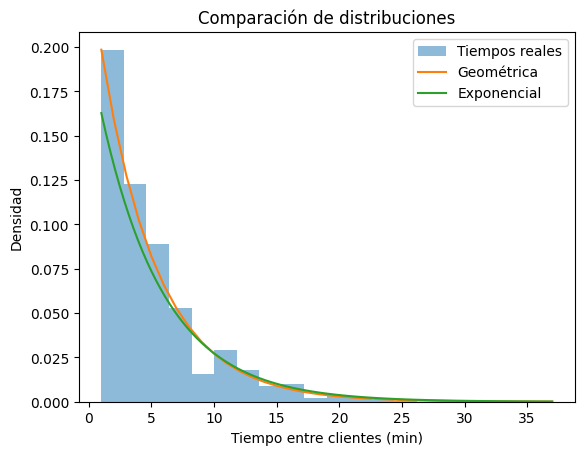

In [70]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import geom, expon

# Asumiendo que 'df' es tu DataFrame con la columna 'Tiempo_Entre_Pedidos (min)'
tiempos_entre_clientes = df['Tiempo_Entre_Pedidos (min)']

# Histograma de los tiempos reales
plt.hist(tiempos_entre_clientes, bins=20, density=True, alpha=0.5, label='Tiempos reales')

# Ajustar una distribución geométrica y exponencial
p_geom = 1 / tiempos_entre_clientes.mean()  # Parámetro de la geométrica
lambda_expon = 1 / tiempos_entre_clientes.mean() # Parámetro de la exponencial

# Generar datos teóricos para las distribuciones
x_geom = np.arange(tiempos_entre_clientes.min(), tiempos_entre_clientes.max() + 1)
x_expon = np.linspace(tiempos_entre_clientes.min(), tiempos_entre_clientes.max(), 100)

# Graficar las distribuciones teóricas
plt.plot(x_geom, geom.pmf(x_geom, p_geom), label='Geométrica')
plt.plot(x_expon, expon.pdf(x_expon, scale=1/lambda_expon), label='Exponencial')

plt.legend()
plt.title('Comparación de distribuciones')
plt.xlabel('Tiempo entre clientes (min)')
plt.ylabel('Densidad')
plt.show()

Con esa grafica podemos analizar la probabilidad de que vengan en -5 minutos o una vaina asi, sacando las formulas de la geometrica y exponencial ok
